# Multi-Variable Stochastic Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Apartment price dataframe

In [2]:
df = pd.read_csv("prices.csv")
df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Preprocessing

### Normalizing

In [3]:
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## Getting the feature size

In [4]:
n_features = len(df_norm.columns) - 1 # ignoring the target 'price'
n_features

2

## Creating vector of $W$s based on the feature size

In [6]:
# Create an array with random samples from a uniform distribution over [0, 1)
w = np.random.rand(1, n_features+1)
w

array([[0.59072005, 0.65430295, 0.08095251]])

## Extracting the features and the target

In [7]:
X = np.array(df_norm.drop('price', axis=1))
y = df_norm.iloc[:, 2:3].values

## Creating $X_{0}$

In [13]:
def insert_ones(X):
    ones = np.ones([X.shape[0], 1])
    return np.concatenate((ones, X), axis=1)

In [18]:
X = insert_ones(X)

## Defining the cost

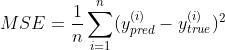

In [16]:
def MSE(w, X, y):
    n = len(X)
    error = (X @ w.T - y)
    cost = np.sum(np.power(error, 2))
    return cost/n

## Gradient Descent

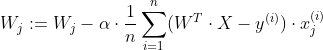

In [17]:
def gradient_descent(w, X, y, alpha, epoch):
    cost = np.zeros(epoch)

    for i in range(epoch):
        w = w - (alpha/len(X)) * np.sum((X @ w.T - y) * X, axis=0)
        cost[i] = MSE(w, X, y)

    return w, cost

## Init parameters

In [19]:
alpha = 0.01
epoch = 800

## Running

In [20]:
w, cost = gradient_descent(w, X, y, alpha, epoch)

## Final cost

In [21]:
MSE(w, X, y)

0.2614016831653309

### Showing the cost evolution

Text(0.5, 1.0, 'Error vs. Epoch')

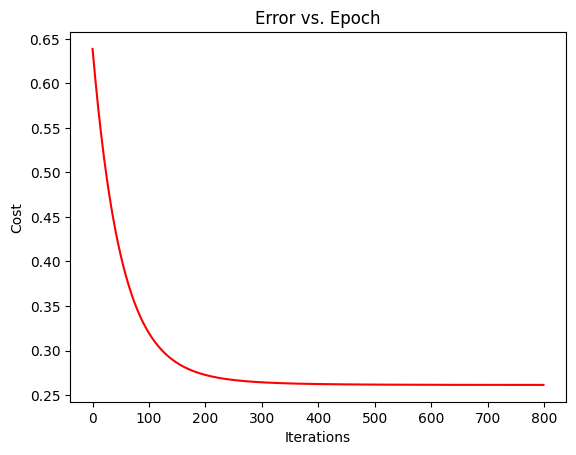

In [24]:
fig, ax = plt.subplots()
ax.plot(np.arange(epoch), cost, 'r')
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Error vs. Epoch")

### Showing the weights

In [25]:
w

array([[ 1.90343210e-04,  8.78994833e-01, -4.74080991e-02]])



---



# PREDICTION - CHALLENGE

TO PERFORM A REGRESSION USING MULTIPLE VARIABLES:

- Receive new values ​​for [[size, bedroom]]
- Preprocess using the mean and standard deviation of the original set
- Perform the regression on the X @ w.T model
- Destandardize the prediction value by obtaining the final regression value